# Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

**In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.**

*Understanding the business objective and the data*


**The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.**


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

**the first two months are the ‘good’ phase,**

**the third month is the ‘action’ phase,**

**while the fourth month is the ‘churn’ phase.**

In [196]:
# sTAGE 1:
# Data understanding, preparation, and feature engineering  (35%)
# All important data quality checks are performed and inconsistent/missing data is handled appropriately.
# Relevant EDA is done using plots and summaries. The insights from EDA are clearly derived and explained. 
# Filtering high-value customers and tagging churned customers is done correctly. 
# Feature engineering is conducted rigorously and correctly. An appropriate set of features is used to build the model.

In [228]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [229]:
# read data
df = pd.read_csv("telecom_churn_data.csv")

In [230]:
df.shape

(99999, 226)

In [231]:
# look at initial rows of the data
df.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,

In [232]:
# look at data statistics
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [233]:
# create backup of data
df_original = df.copy()

In [234]:
# feature type summary
df.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [235]:
ObCols = df.loc[:, df.dtypes == 'object']
print
ObCols.columns

<function print>

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [236]:
IntCols = df.loc[:, df.dtypes == 'int64']
IntCols.columns

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

In [237]:
FloatCols = df.loc[:, df.dtypes == 'float64']
FloatCols.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=179)

In [238]:
for i in ObCols:
    print (df[i].value_counts())

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64
7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     399

In [239]:
df[FloatCols.columns].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,

In [240]:
df[IntCols.columns].describe()

,mobile_number,circle_id,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,63.156252,59.385804,62.641716,43.901249,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749
std,6.956694e+05,0.0,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,97.356649,95.915385,104.431816,90.809712,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842
min,7.000000e+09,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,7.000606e+09,109.0,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000
50%,7.001205e+09,109.0,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000
75%,7.001812e+09,109.0,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,110.000000,110.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000
max,7.002411e+09,109.0,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,4.000000,5.000000,5.000000,4.000000,42.000000,48.000000,44.000000,40.000000,14.000000,16.000000,16.000000,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000


In [241]:
df.shape

(99999, 226)

In [242]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling Missing Values

In [243]:

# checking NULL values in the data, with more than 50% missing values
Nullinfo = df.isnull().sum()*100/df.shape[0]
Nullinfo[Nullinfo>50]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

# Impute  Missing Values

In [244]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [245]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [246]:
# In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [247]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [248]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [249]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(df[zero_impute].isnull().sum()*100/df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(df[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [250]:
# drop id and date columns
print("Shape before dropping: ", df.shape)
df = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", df.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


# ii) Replace NaN values in categorical variables
We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [251]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [252]:
# missing value ratio
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


# iii) Drop variables with more than a given threshold (70%) of missing values

In [253]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [254]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


In [255]:
##CHECKING FOR NULLS
df.isnull().sum().values

array([1018, 1018, 1018,    0,    0,    0,    0, 3937, 3859, 5378, 7745,
       3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378,
       7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859,
       5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937,
       3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745,
       3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378,
       7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745,    0,    0,
          0,    0, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937,
       3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745,
       3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378,
       7745, 3937, 3859, 5378, 7745,    0,    0,    0,    0, 3937, 3859,
       5378, 7745, 3937, 3859, 5378, 7745, 3937, 3859, 5378, 7745,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [257]:
df.shape

(99999, 196)

In [258]:
#Fill all the numerical Nulls with zeros
df.fillna(0,inplace=True)

In [259]:
##CHECKING FOR NULLS
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# filter high-value customers

calculate total data recharge amount

In [260]:
# calculate the total data recharge amount for June and July --> 
# number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [261]:
# calculate total recharge amount for June and July --> 
# call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [262]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [263]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [264]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape


(30001, 201)

In [265]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 196)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.



# Derive output variable Churn

In [266]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [267]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [268]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [269]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [270]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [271]:
#Dropping columns that have got only zeros 
for i in churn_filtered.columns:
    if np.count_nonzero(churn_filtered[i]) >= 0:
        print (i, np.count_nonzero(churn_filtered[i]))

loc_og_t2o_mou 0
std_og_t2o_mou 0
loc_ic_t2o_mou 0
arpu_6 29774
arpu_7 29778
arpu_8 28991
arpu_9 28079
onnet_mou_6 27404
onnet_mou_7 27350
onnet_mou_8 26385
onnet_mou_9 25289
offnet_mou_6 28569
offnet_mou_7 28511
offnet_mou_8 27596
offnet_mou_9 26541
roam_ic_mou_6 6354
roam_ic_mou_7 5065
roam_ic_mou_8 5338
roam_ic_mou_9 5135
roam_og_mou_6 6374
roam_og_mou_7 5121
roam_og_mou_8 5314
roam_og_mou_9 5081
loc_og_t2t_mou_6 26163
loc_og_t2t_mou_7 26253
loc_og_t2t_mou_8 24940
loc_og_t2t_mou_9 23942
loc_og_t2m_mou_6 27444
loc_og_t2m_mou_7 27512
loc_og_t2m_mou_8 26251
loc_og_t2m_mou_9 25219
loc_og_t2f_mou_6 14892
loc_og_t2f_mou_7 15146
loc_og_t2f_mou_8 14405
loc_og_t2f_mou_9 13724
loc_og_t2c_mou_6 7353
loc_og_t2c_mou_7 7760
loc_og_t2c_mou_8 7565
loc_og_t2c_mou_9 6845
loc_og_mou_6 27654
loc_og_mou_7 27698
loc_og_mou_8 26448
loc_og_mou_9 25446
std_og_t2t_mou_6 16817
std_og_t2t_mou_7 16706
std_og_t2t_mou_8 15530
std_og_t2t_mou_9 14687
std_og_t2m_mou_6 21182
std_og_t2m_mou_7 20905
std_og_t2m_mou_8 19

In [272]:
np.count_nonzero(churn_filtered['arpu_6'])

29774

In [273]:
zerocols=[]
for col in churn_filtered.columns:
    if np.count_nonzero(churn_filtered[col]) == 0:
        zerocols.append(col)

In [274]:
zerocols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [275]:
churn_filtered['loc_og_t2o_mou'].value_counts()

0.0    30001
Name: loc_og_t2o_mou, dtype: int64

In [276]:
#Dropping columns that have got only zeros 
churn_filtered.drop(zerocols,axis=1, inplace=True)

In [277]:
churn_filtered.shape

(30001, 186)

In [278]:
churn_filtered.describe(include='all')

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

In [281]:
# checking the resultant dimension of dataframe
churn_filtered.shape

(30001, 186)

## Derviving differences to check if that gives meaning to the data
The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [282]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

churn_filtered['max_rech_data_diff'] = churn_filtered.max_rech_data_8 - ((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)

churn_filtered['av_rech_amt_data_diff'] = churn_filtered.av_rech_amt_data_8 - ((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

delete columns that belong to the churn month (9th month)

In [283]:
# delete all variables relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30001, 164)

In [284]:
# extract all names that end with 9
col_9_names = df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

In [285]:
churn_filtered[num_cols].head(1)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.0,4.13,0.0,0.0,1.15,0.0,0.0,5.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.4,0.0,101.2,3.58,7.7025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.44,0.0,0.0,0.0,5.44,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555


# Univariate abd BiVariate Analysis

In [286]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [287]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    else:
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


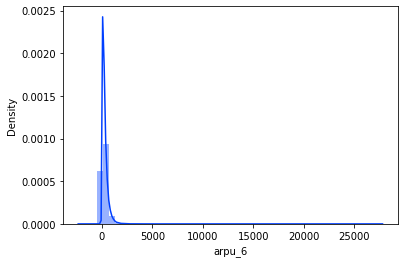

In [289]:
univariate(df.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


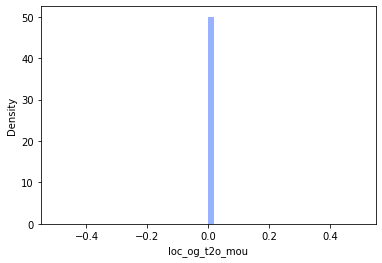

In [290]:
univariate(df.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


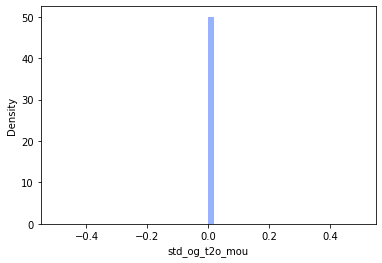

In [291]:
univariate(df.std_og_t2o_mou)

count    99999.000000
mean       125.864313
std        302.023240
min          0.000000
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


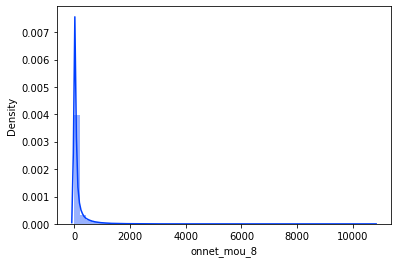

In [292]:
univariate(df.onnet_mou_8)

count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


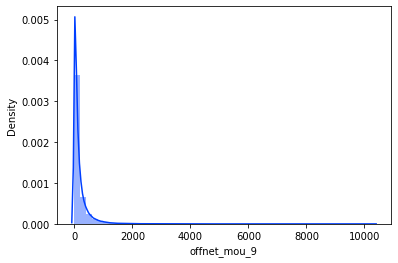

In [293]:
univariate(df.offnet_mou_9)

In [296]:
churn_filtered.head(1)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.0,4.13,0.0,0.0,1.15,0.0,0.0,5.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.2,3.58,1,7.7025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.44,0.0,0.0,0.0,5.44,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555


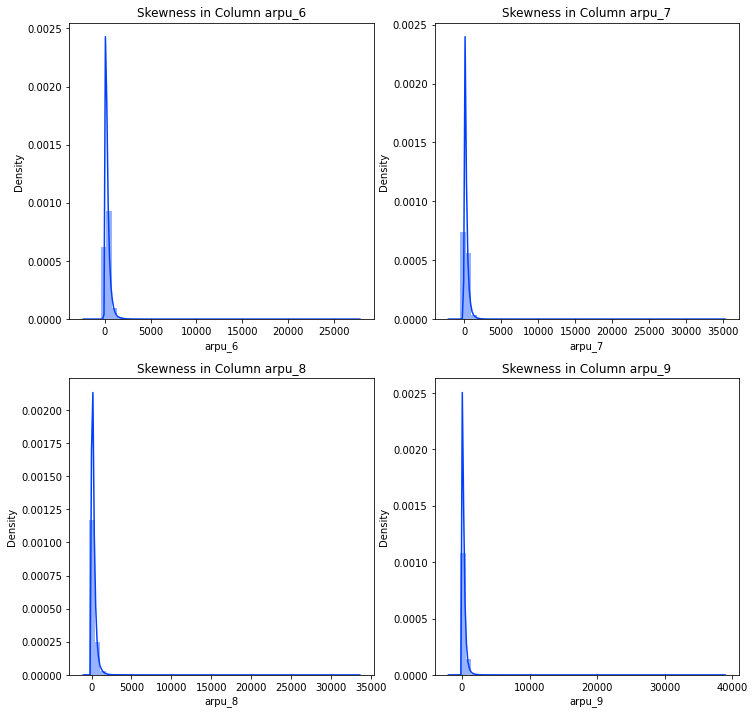

In [297]:
#Understanding Skewness in the data
from matplotlib import style
plt.style.use('seaborn-bright')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

def var_dist_plot(var,axes):
    sns.distplot(df[var],ax=axes)
    axes.set_title('Skewness in Column ' + var)

        
var_dist_plot("arpu_6",ax1)
var_dist_plot("arpu_7",ax2)
var_dist_plot("arpu_8",ax3)
var_dist_plot("arpu_9",ax4)

plt.show()

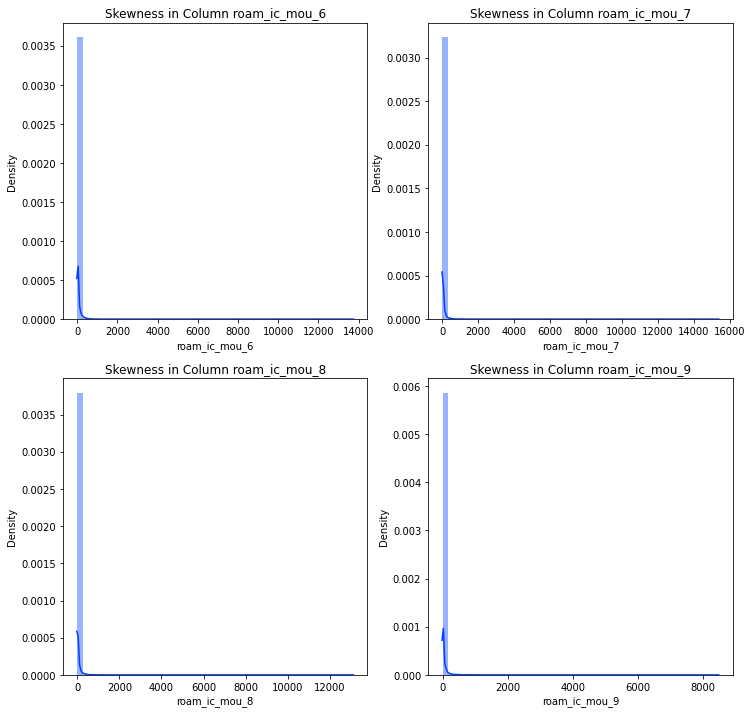

In [298]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

var_dist_plot("roam_ic_mou_6",ax1)
var_dist_plot("roam_ic_mou_7",ax2)
var_dist_plot("roam_ic_mou_8",ax3)
var_dist_plot("roam_ic_mou_9",ax4)

plt.show()

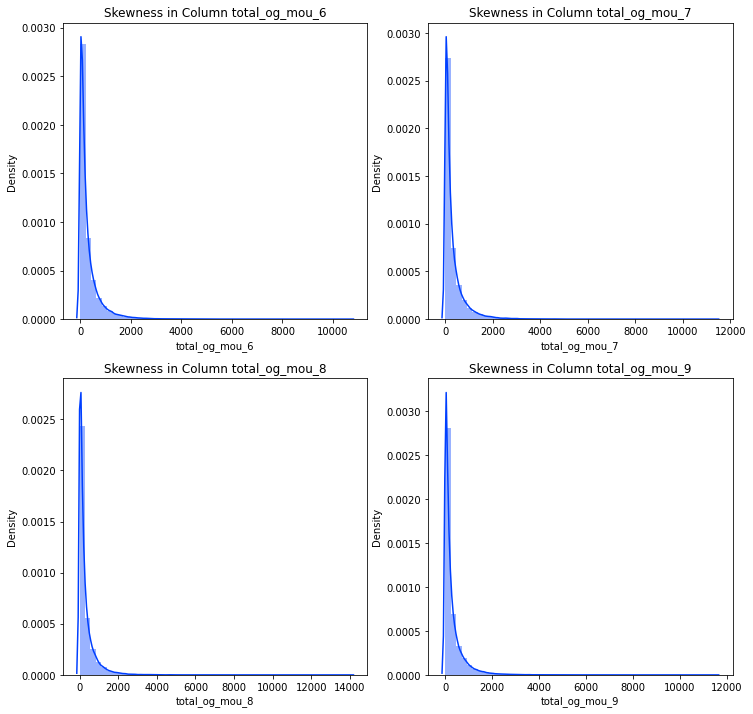

In [299]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

var_dist_plot("total_og_mou_6",ax1)
var_dist_plot("total_og_mou_7",ax2)
var_dist_plot("total_og_mou_8",ax3)
var_dist_plot("total_og_mou_9",ax4)

plt.show()

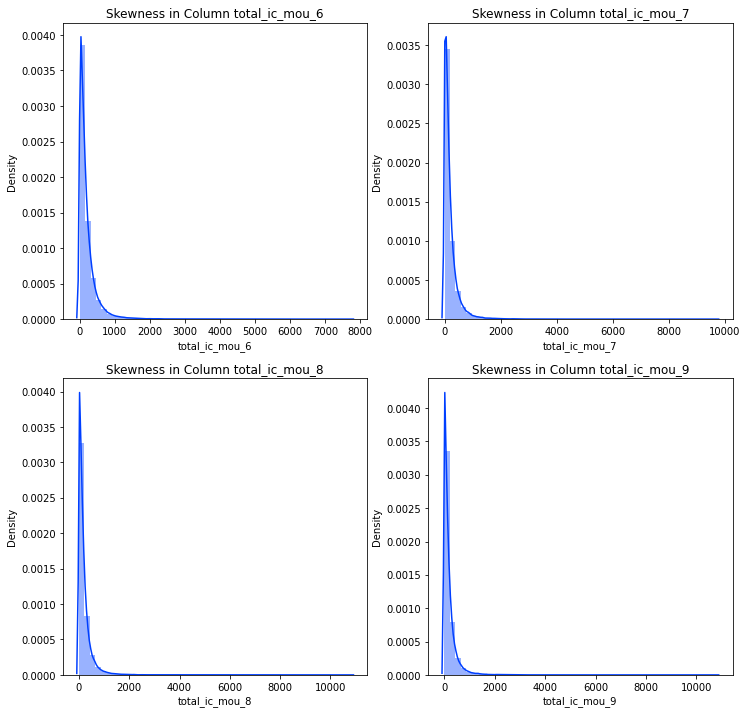

In [300]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

var_dist_plot("total_ic_mou_6",ax1)
var_dist_plot("total_ic_mou_7",ax2)
var_dist_plot("total_ic_mou_8",ax3)
var_dist_plot("total_ic_mou_9",ax4)

plt.show()


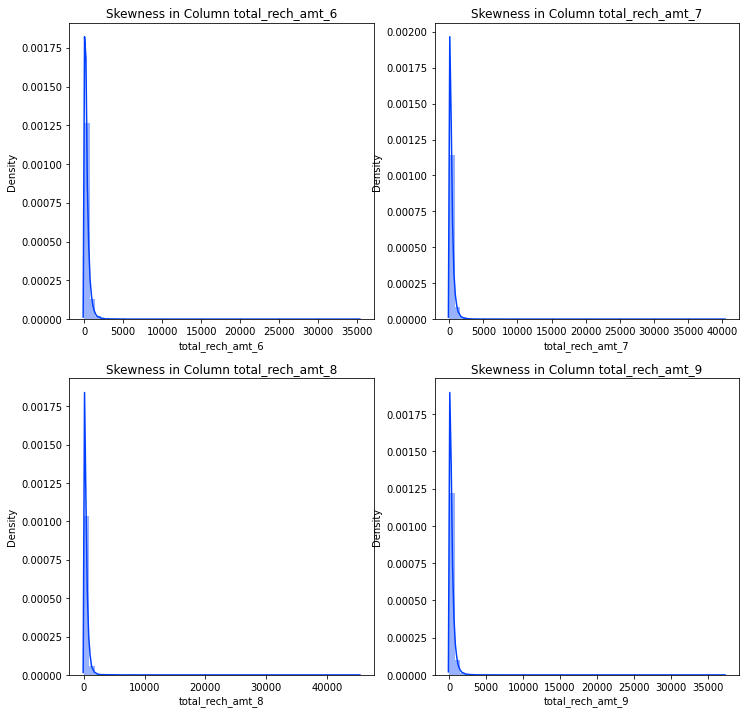

In [301]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

var_dist_plot("total_rech_amt_6",ax1)
var_dist_plot("total_rech_amt_7",ax2)
var_dist_plot("total_rech_amt_8",ax3)
var_dist_plot("total_rech_amt_9",ax4)

plt.show()

Variables are very skewed towards the left.

#Understanding Relationship between churn and different columns


# bivariate

In [308]:
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    try:
      if variable.dtype == 'category':
        return 'categorical'
    except:
      if variable.dtype =='object':
        return 'categorical'

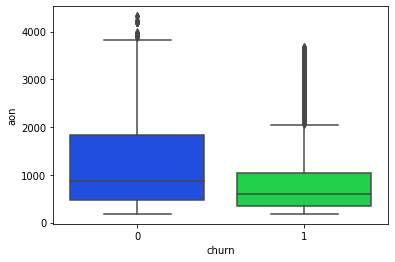

In [309]:
bivariate(churn_filtered.churn, churn_filtered.aon)

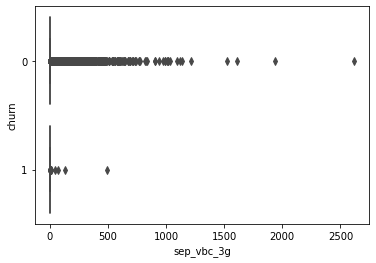

In [310]:
bivariate(churn_filtered.sep_vbc_3g, churn_filtered.churn)


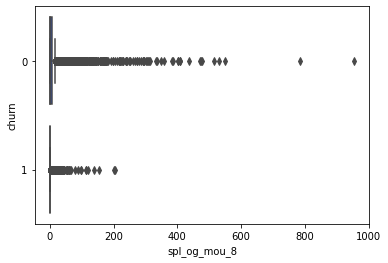

In [311]:
bivariate(churn_filtered.spl_og_mou_8, churn_filtered.churn)


In [312]:
pd.crosstab(churn_filtered.churn, churn_filtered.night_pck_user_8, normalize='columns')*100


night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [313]:
pd.crosstab(churn_filtered.churn, churn_filtered.sachet_3g_8)


sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


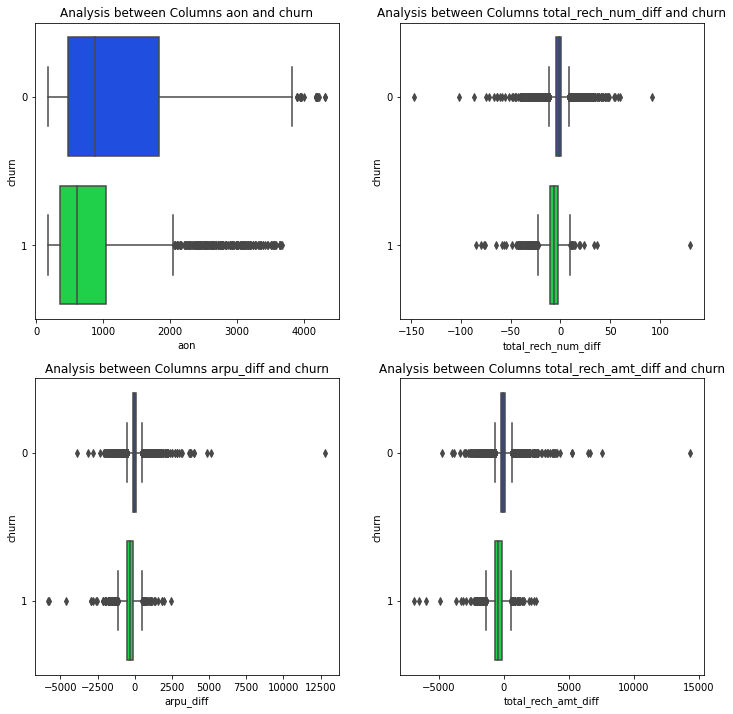

In [314]:
#Understanding Relationship between churn and different columns
from matplotlib import style
plt.style.use('seaborn-bright')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

def var_pair_plot(var1,var2,axes):
    sns.boxplot(churn_filtered[var1],churn_filtered[var2],ax=axes)
    axes.set_title('Analysis between Columns ' + var1 + ' and ' + var2)

var_pair_plot("aon","churn",ax1)
var_pair_plot("total_rech_num_diff","churn",ax2)
var_pair_plot("arpu_diff","churn",ax3)
var_pair_plot("total_rech_amt_diff","churn",ax4)

plt.show()    

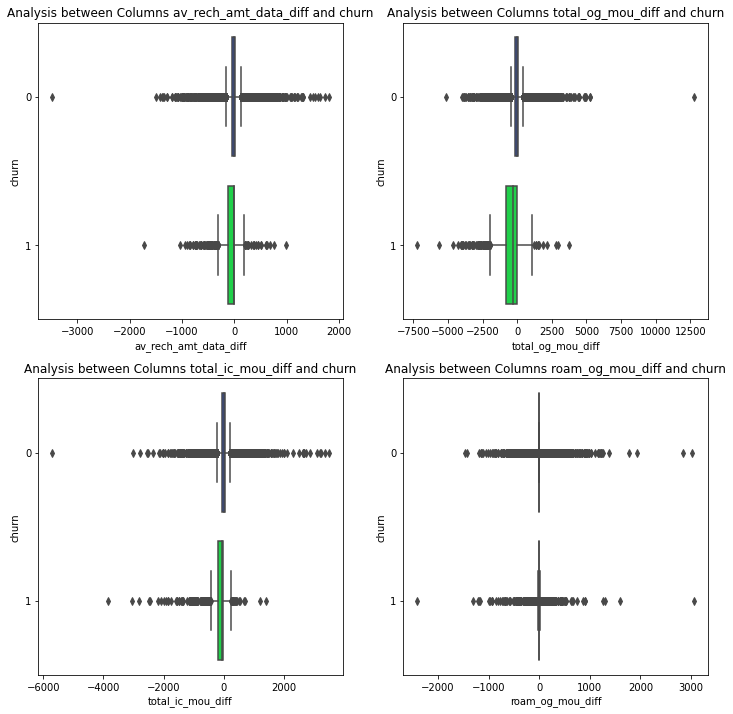

In [315]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
        
var_pair_plot("av_rech_amt_data_diff","churn",ax1)
var_pair_plot("total_og_mou_diff","churn",ax2)
var_pair_plot("total_ic_mou_diff","churn",ax3)
var_pair_plot("roam_og_mou_diff","churn",ax4)

plt.show()

# Cap outliers in all numeric variables with k-sigma technique

In [316]:
def outlier_treat(ar, fact=3):
    upper_limit = ar.mean() + fact*ar.std()
    lower_limit = ar.mean() - fact*ar.std()
    ar[ar<lower_limit] = lower_limit
    ar[ar>upper_limit] = upper_limit
    return ar

In [317]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(outlier_treat, axis=0)

In [318]:
churn_filtered.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 164 entries, arpu_6 to vol_3g_mb_diff
dtypes: category(7), float64(157)
memory usage: 36.1 MB


## Model Building and Business derivations


In [319]:
Model_data = churn_filtered.copy()

In [320]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [321]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

Train Test split

In [322]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100, stratify = y)

In [323]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 163)

(22500,)

(7501, 163)

(7501,)

Aggregating the categorical columns

In [324]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.100010
0.0     0.065926
1.0     0.103560
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.116269
0.0     0.054935
1.0     0.056604
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.143197
0.0     0.027404
1.0     0.020243
Name: churn, dtype: float64

fb_user_6
-1.0    0.100010
0.0     0.076754
1.0     0.066076
Name: churn, dtype: float64

fb_user_7
-1.0    0.116269
0.0     0.069176
1.0     0.053789
Name: churn, dtype: float64

fb_user_8
-1.0    0.143197
0.0     0.064303
1.0     0.023090
Name: churn, dtype: float64

In [325]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.100010, 0: 0.065926, 1: 0.103560},
           'night_pck_user_7' : {-1: 0.116269, 0: 0.054935 , 1: 0.056604 },
           'night_pck_user_8' : {-1: 0.143197 , 0: 0.027404 , 1: 0.020243 },
           'fb_user_6'        : {-1: 0.100010 , 0: 0.076754 , 1: 0.066076 },
           'fb_user_7'        : {-1: 0.116269 , 0: 0.069176 , 1: 0.053789 },
           'fb_user_8'        : {-1: 0.143197 , 0: 0.064303 , 1: 0.023090 }
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [327]:
# X_train['night_pck_user_6']

In [328]:
# check data type of categorical columns - make sure they are numeric

X_train[[col for col in cat_cols if col not in ['churn']]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 23321 to 16327
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


PCA

In [329]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [330]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [331]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.46
1       20.86
2       26.66
3       31.59
4       35.66
5       39.36
6       42.12
7       44.70
8       46.99
9       49.13
10      51.15
11      53.08
12      54.89
13      56.59
14      58.21
15      59.68
16      61.05
17      62.42
18      63.74
19      65.04
20      66.24
21      67.41
22      68.52
23      69.61
24      70.64
25      71.61
26      72.56
27      73.47
28      74.37
29      75.25
30      76.11
31      76.92
32      77.72
33      78.51
34      79.27
35      80.00
36      80.72
37      81.41
38      82.07
39      82.72
40      83.34
41      83.90
42      84.45
43      84.99
44      85.53
45      86.04
46      86.53
47      87.00
48      87.48
49      87.92
50      88.34
51      88.73
52      89.11
53      89.48
54      89.84
55      90.19
56      90.53
57      90.86
58      91.18
59      91.50
60      91.81
61      92.11
62      92.40
63      92.68
64      92.96
65      93.23
66      93.49
67      93.74
68      93.98
69      94.22
70      94.44
71    

~ 60 components explain 90% variance

~ 75 components explain 95% variance

<Figure size 630x360 with 0 Axes>

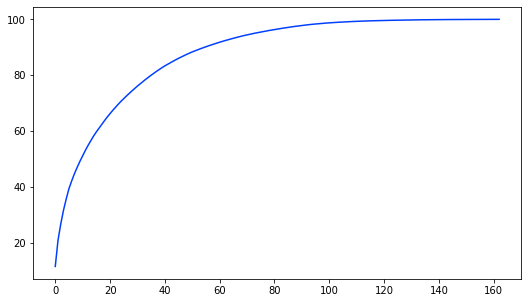

In [335]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 164 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [333]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

~ 75 components explain 95% variance

Text(0, 0.5, 'Cumulative variance explained')

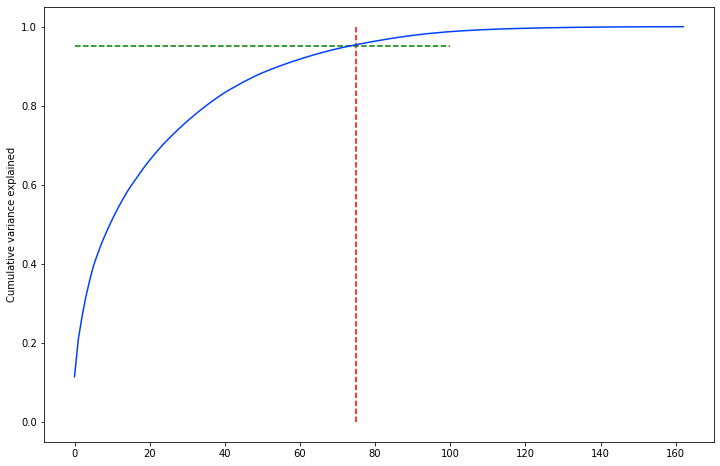

In [340]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

# PCA and Logistic Regression

In [349]:
# create pipeline
PCA_VARS = 75
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [350]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=75)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.8256

Evaluate on test data

In [351]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
print(classification_report(y_test, y_pred))

[[5656 1235]
 [ 100  510]]
Sensitivity: 	0.84
Specificity: 	0.82
AUC:    	 0.9
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6891
           1       0.29      0.84      0.43       610

    accuracy                           0.82      7501
   macro avg       0.64      0.83      0.66      7501
weighted avg       0.93      0.82      0.86      7501



Hyperparameter tuning - PCA and Logistic Regression

In [352]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [353]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [354]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [355]:
# cross validation results
# pd.DataFrame(model.cv_results_)

In [356]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8990588173045015
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [357]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5848 1043]
 [ 116  494]]
Sensitivity: 	0.81
Specificity: 	0.85
AUC:    	 0.9


# Random Forest

In [358]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [359]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [360]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9325529724469442
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [361]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6766  125]
 [ 318  292]]
Sensitivity: 	0.48
Specificity: 	0.98
AUC:    	 0.93


Poor sensitivity. The best model is PCA along with Logistic regression.

# ii) Choosing best features

In [362]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [363]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.2s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [364]:
# OOB score
rf_model.oob_score_

0.9442666666666667

In [365]:
len(X_train.columns)

163

In [366]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6786  105]
 [ 334  276]]
Sensitivity: 	0.45
Specificity: 	0.98
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


# Feature Importance

In [367]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,4.639566
1,loc_ic_t2m_mou_8,4.636440
2,loc_ic_mou_8,4.627229
3,loc_ic_t2t_mou_8,3.622302
4,loc_og_t2m_mou_8,3.215831
5,loc_og_mou_8,3.161242
6,arpu_diff,2.909195
7,last_day_rch_amt_8,2.328238
8,total_rech_amt_diff,2.110330
9,av_rech_amt_data_8,1.947097


Extracting top 30 features

In [368]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

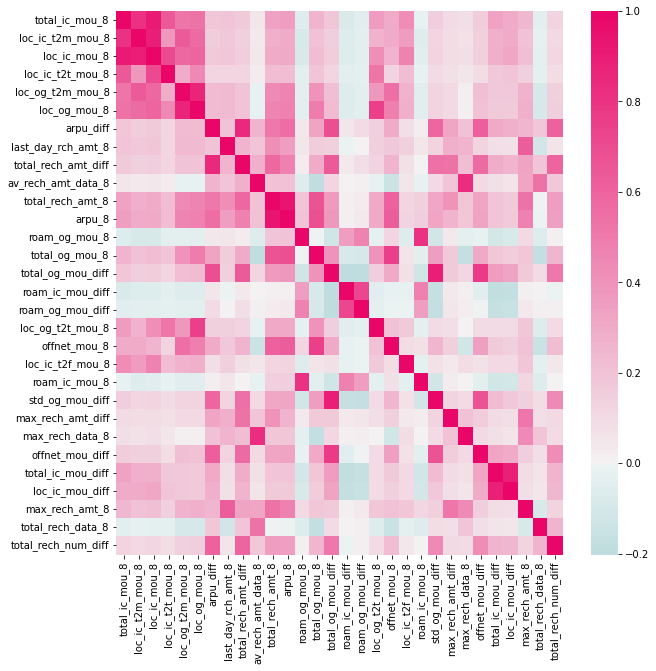

In [369]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [370]:
top_features

0          total_ic_mou_8
1        loc_ic_t2m_mou_8
2            loc_ic_mou_8
3        loc_ic_t2t_mou_8
4        loc_og_t2m_mou_8
5            loc_og_mou_8
6               arpu_diff
7      last_day_rch_amt_8
8     total_rech_amt_diff
9      av_rech_amt_data_8
10       total_rech_amt_8
11                 arpu_8
12          roam_og_mou_8
13         total_og_mou_8
14      total_og_mou_diff
15       roam_ic_mou_diff
16       roam_og_mou_diff
17       loc_og_t2t_mou_8
18           offnet_mou_8
19       loc_ic_t2f_mou_8
20          roam_ic_mou_8
21        std_og_mou_diff
22      max_rech_amt_diff
23        max_rech_data_8
24        offnet_mou_diff
25      total_ic_mou_diff
26        loc_ic_mou_diff
27         max_rech_amt_8
28      total_rech_data_8
29    total_rech_num_diff
Name: variables, dtype: object

In [387]:
top_features[:9]

0         total_ic_mou_8
1       loc_ic_t2m_mou_8
2           loc_ic_mou_8
3       loc_ic_t2t_mou_8
4       loc_og_t2m_mou_8
5           loc_og_mou_8
6              arpu_diff
7     last_day_rch_amt_8
8    total_rech_amt_diff
Name: variables, dtype: object

In [388]:
X_train = X_train[top_features[:9]]
X_test = X_test[top_features[:9]]

In [389]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [390]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [391]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8660223342584492
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2'}


# Save the ML Model

In [392]:
# Save the model
# from sklearn.externals import joblib 
import joblib

# Save the model as a pickle in a file 
joblib.dump(model, 'rf_model.pkl') 

['rf_model.pkl']

In [393]:
# Load the ML Model

In [394]:
# Save the model
# from sklearn.externals import joblib

# Load the model from the file 
rf_pickle_model = joblib.load('rf_model.pkl') 

Evaluate the Loaded Model

In [395]:
# predict churn on test data
y_pred_load = rf_pickle_model.predict(X_test)

# create onfusion matrix
cm_load = confusion_matrix(y_test, y_pred_load)
print(cm_load)

# check sensitivity and specificity
sensitivity_load, specificity_load, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity_load, 2), "\n", "Specificity: \t", round(specificity_load, 2), sep='')

# check area under curve
y_pred_prob_load = rf_pickle_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))

[[5678 1213]
 [ 133  477]]
Sensitivity: 	0.79
Specificity: 	0.85
ROC:    	 0.86


Evaluate the trained model object

In [396]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5678 1213]
 [ 133  477]]
Sensitivity: 	0.78
Specificity: 	0.82
ROC:    	 0.86


Extract the intercept and the coefficients from the logistic model

In [397]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [398]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [399]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [400]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,arpu_diff,last_day_rch_amt_8,total_rech_amt_diff
0,-1.403327,-0.330187,-0.395756,-0.321392,-0.272032,-0.320252,-0.201633,-0.299827,-0.277567,-0.566807


# Business Insights/ Recommendations


*   1. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone. 
*   2. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

*   3. To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.








4. FEW top important features are

In [402]:
top_features[:15]

0          total_ic_mou_8
1        loc_ic_t2m_mou_8
2            loc_ic_mou_8
3        loc_ic_t2t_mou_8
4        loc_og_t2m_mou_8
5            loc_og_mou_8
6               arpu_diff
7      last_day_rch_amt_8
8     total_rech_amt_diff
9      av_rech_amt_data_8
10       total_rech_amt_8
11                 arpu_8
12          roam_og_mou_8
13         total_og_mou_8
14      total_og_mou_diff
Name: variables, dtype: object

5 We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.
E.g.:
If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.


In [404]:
coefficients

,intercept,total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,arpu_diff,last_day_rch_amt_8,total_rech_amt_diff
0,-1.403327,-0.330187,-0.395756,-0.321392,-0.272032,-0.320252,-0.201633,-0.299827,-0.277567,-0.566807



6. Target the customers, whose outgoing others charge in July and incoming others on August are less.

7. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

8. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.
9. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.

In [405]:
# FEW  PLOTs

Plots of important predictors for churn and non churn customers

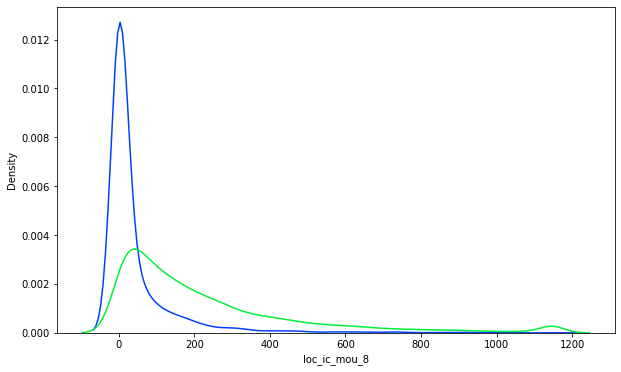

In [407]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(churn_filtered[churn_filtered['churn']==1]['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(churn_filtered[churn_filtered['churn']==0]['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

10. We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.